In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float 
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
sqlLite = "../Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{sqlLite}")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#only measure appears to have "date"
lastDate = session.query(measurement.date).order_by(measurement.date.desc()).first()
lastDate

('2017-08-23')

In [10]:
beginDate = dt.date(2017,8,23) - dt.timedelta(days=365)
beginDate

datetime.date(2016, 8, 23)

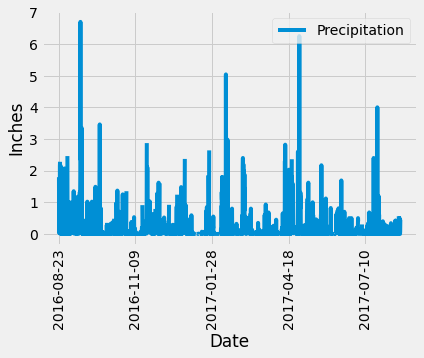

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
beginDate = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= beginDate).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcpDF = pd.DataFrame(prcp,columns=['Date','Precipitation']).set_index('Date')
#prcpDF #sanity check

# Sort the dataframe by date
prcpDF = prcpDF.sort_values('Date')
prcpDF

# Use Pandas Plotting with Matplotlib to plot the data

prcpDF.plot()
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc="upper right")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpDF.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
numStats = session.query(station).count()
#numStats #sanity check

In [18]:
#station.__dict__

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station))\
            .group_by(measurement.station) \
            .order_by(desc(func.count(measurement.station))).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [17]:
# Close Session
session.close()